In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%pwd


'C:\\Users\\tretec'

In [2]:
df=pd.read_csv("titanic-passengers.csv",encoding="ISO-8859-1",sep=";")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [3]:
df["Cabin"].isnull()

0       True
1      False
2       True
3       True
4      False
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Cabin, Length: 891, dtype: bool

In [4]:
df["Cabin"].isnull().sum()

687

In [5]:
df["Fare"].isnull().sum()

0

In [6]:
df["Ticket"].isnull().sum()

0

In [7]:
df["Embarked"].isnull().sum()

2

In [8]:
md=st.mode(df["Embarked"])
df["Embarked"].fillna(md,inplace=True)

In [9]:
df["Embarked"].isnull().sum()

0

In [10]:
nbrelt=len(df["Cabin"])
print("nbr d'elt est ",nbrelt)
print(df["Cabin"].value_counts())

nbr d'elt est  891
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64


In [11]:
df["Cabin"].fillna("G6",inplace=True)

In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,G6,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,G6,S


In [13]:
df["Cabin"].isnull().sum()

0

In [14]:
df["Name"].isnull().sum()

0

In [15]:
df["Sex"].isnull().sum()

0

In [16]:
df["Age"].isnull().sum()

177

In [17]:
md=st.median(df["Age"])
df["Age"].fillna(md,inplace=True)

In [18]:
df["Age"].isnull().sum()

0

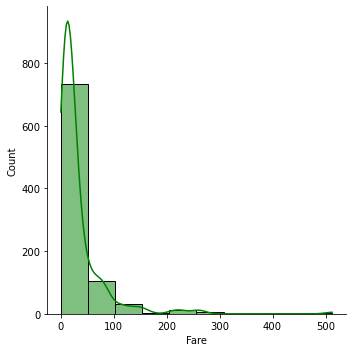

In [19]:
sns.displot(df["Fare"],bins=10,kde=True,color="green")


<AxesSubplot:xlabel='Survived', ylabel='count'>

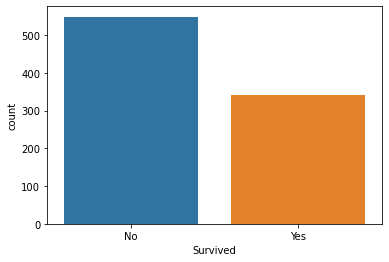

In [20]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

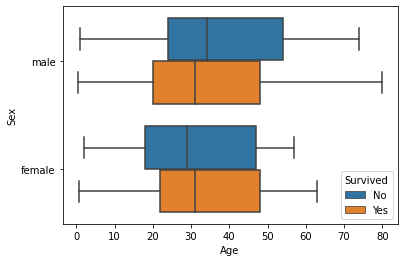

In [21]:
sns.boxplot(x="Age",y="Sex",hue="Survived",data=df)

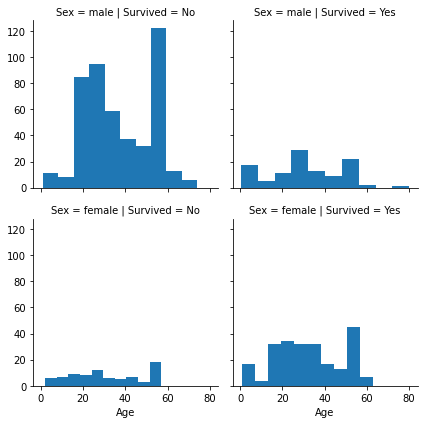

In [22]:
g=sns.FacetGrid(df,col="Survived",row="Sex")
g.map(plt.hist,"Age")

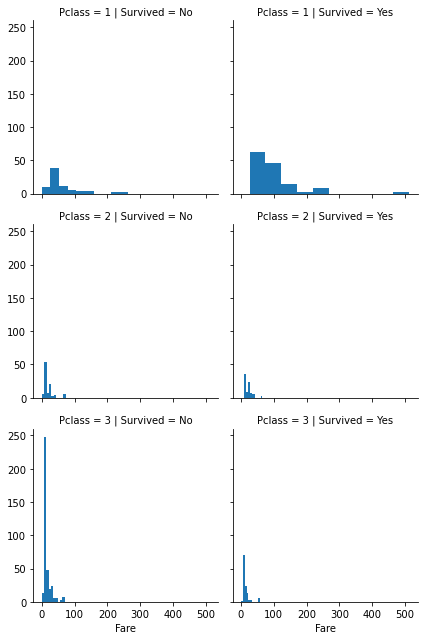

In [23]:
g=sns.FacetGrid(df,col="Survived",row="Pclass")
g.map(plt.hist,"Fare")

In [24]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })

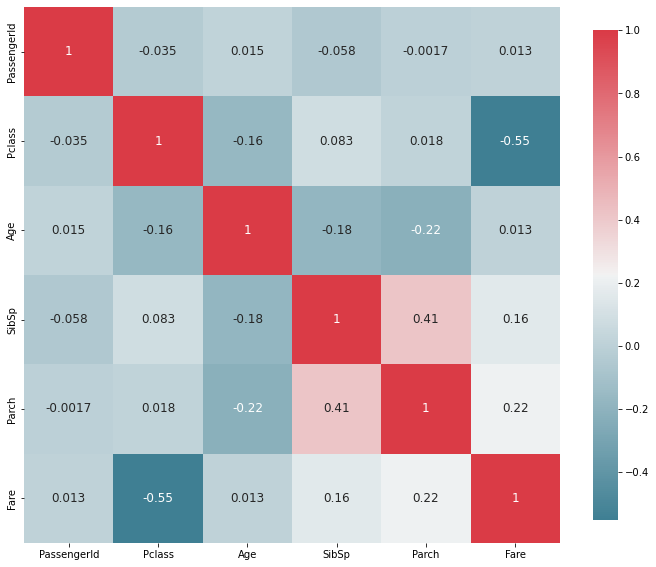

In [25]:
plot_correlation_map( df )

In [29]:
from sklearn.preprocessing import LabelEncoder
df['Survived'] = df['Survived'].map({'No':0, 'Yes':1})
encoder=LabelEncoder()
df['Embarked']=encoder.fit_transform(df['Embarked' ])
df["Sex"]=encoder.fit_transform(df["Sex"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,2


In [31]:
x = df[["Age", "Sex"]]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)  #splitting data with test size of 20%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Predicted', ylabel='Survived'>

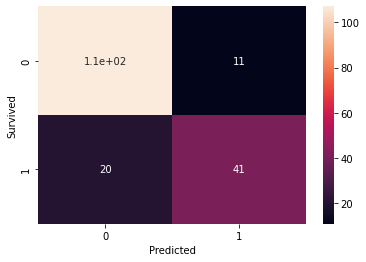

In [32]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Survived'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [33]:
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear", random_state=0).fit(x_train, y_train)
roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])
roc_auc_score(y_train, clf.decision_function(x_train))

0.7739511687625401